### This notebooke is used for visualizing different images with their respective bounding boxes (For different annotation techniques)

In [2]:
import cv2
import matplotlib.pyplot as plt

['Train', 'data\\Positive', 'data\\G0449113.bmp', '1', '2214', '1626', '158', '80']


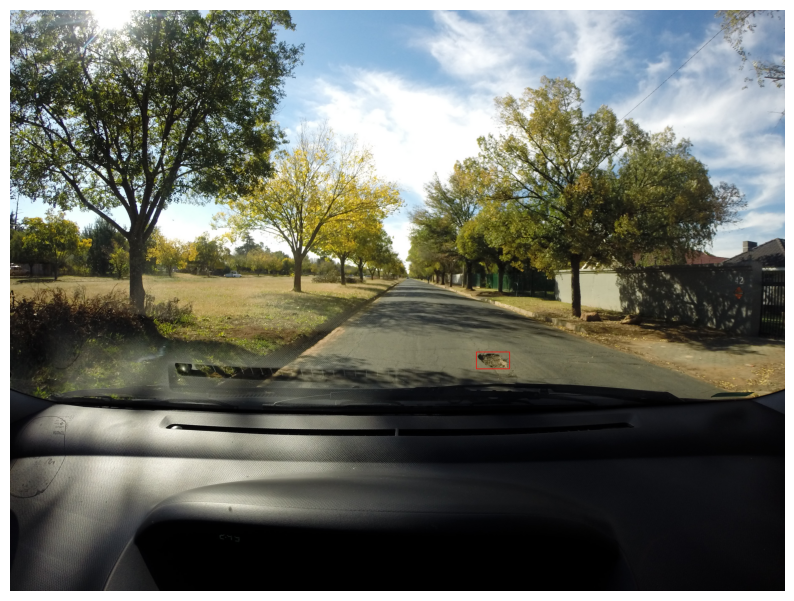

In [28]:
# Step 1: Read the annotation file
image = 'G0449113'
annotation_file = "data/Dataset 1 (Simplex)/simpleTrainFullPhotosSortedFullAnnotations.txt"
image_name = f"{image}.jpg"

# Step 2: Find the corresponding line in the annotation file
with open(annotation_file, 'r') as file:
    lines = file.readlines()

# Extract the line that contains the target image (even though in .txt it's .bmp)
target_line = [line for line in lines if image in line][0]

# Step 3: Parse the data from the line
parts = target_line.strip().split()

print(parts)

# Number of potholes
num_potholes = int(parts[3])

# Extract bounding boxes (4 values for each pothole)
bboxes = []
for i in range(num_potholes):
    x_center = int(parts[4 + i * 4])
    y_center = int(parts[5 + i * 4])
    width = int(parts[6 + i * 4])
    height = int(parts[7 + i * 4])
    bboxes.append((x_center, y_center, width, height))

# Step 4: Load the image (now in .jpg format)
image_path = f"data/Dataset 1 (Simplex)/Train data/Positive data/{image_name}"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 5: Draw the bounding boxes
for (x, y, w, h) in bboxes:
    x1 = x  # top-left x
    y1 = y  # top-left y
    x2 = x + w  # bottom-right x
    y2 = y + h  # bottom-right y
    
    # Draw the bounding box
    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Step 6: Show the image with bounding boxes
plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.show()


### Visualizing from yolo format

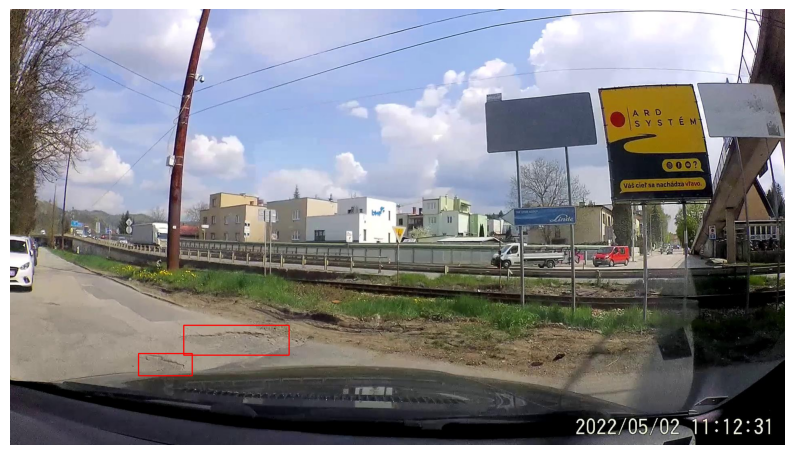

In [1]:
import cv2
import matplotlib.pyplot as plt

image_path = "yolo_data/train/images/Vid_1_Ca_00000000.jpg"
label_path = "yolo_data/train/labels/Vid_1_Ca_00000000.txt"

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_height, image_width, _ = image.shape

with open(label_path, 'r') as file:
    lines = file.readlines()

# Draw bounding boxes on the image
for line in lines:
    class_id, x_center, y_center, width, height = map(float, line.strip().split())

    # Convert YOLO format to pixel coordinates
    x_center *= image_width
    y_center *= image_height
    width *= image_width
    height *= image_height

    # Top-left and bottom-right coordinates
    x1 = int(x_center - width / 2)
    y1 = int(y_center - height / 2)
    x2 = int(x_center + width / 2)
    y2 = int(y_center + height / 2)

    cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.axis("off")
plt.show()
